In [1]:
from CATH_disorder import *
plotly.offline.init_notebook_mode()

%matplotlib inline

In [2]:
sfam = pd.read_csv('./sfam_compiled.tsv', sep='\t', index_col=0)
full_df = pd.read_csv('./compiled.tsv', sep='\t',index_col=0)

df = full_df[['LEN', 'RES', 'SHORT', 'LONG', 'SFAM']]

DOM = DomParser(df)

def domain(d):
    print('Domain: ' + d)
    print('SFAM: '+df.loc[d]['SFAM'])
    print('Length: ' + str(df.loc[d]['LEN']))
    print('Mean disorder - short: '+ str(round(df.loc[d]['SHORT'], 3)) + ', long: ' + str(round(df.loc[d]['LONG'], 3)))
    O = Domain(df, d)
    O.plot_disorder()
    return O.show_structure()

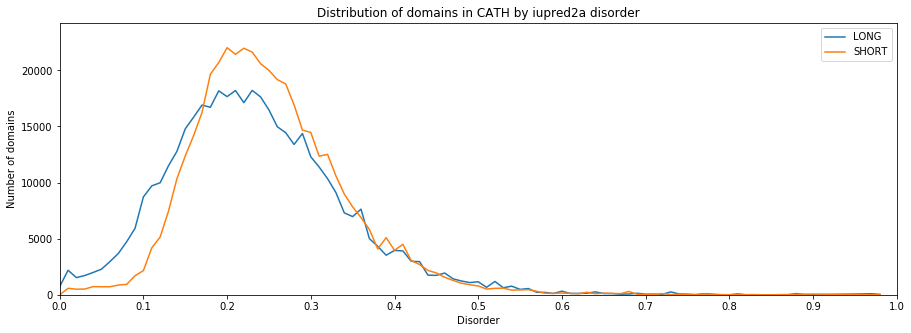

In [3]:
def plt_hist(df):
    fig, ax = plt.subplots(figsize=(15,5))
    long = df.LONG.round(2).value_counts().sort_index()
    short = df.SHORT.round(2).value_counts().sort_index()
    ax.set_xticks(np.arange(0.0,1.1, 0.1))
    ax.set_xlim(0,1)
    ax.set_ylim(0,max(max(long),max(short))*1.1)
    ax.plot(long, linewidth=1.5, label='LONG')
    ax.plot(short, linewidth=1.5, label='SHORT')
    plt.legend()
    plt.title('Distribution of domains in CATH by iupred2a disorder')
    plt.xlabel('Disorder')
    plt.ylabel('Number of domains')
    plt.savefig('./figs/all_domains.png', bbox_inches='tight')
    plt.show()

plt_hist(df)


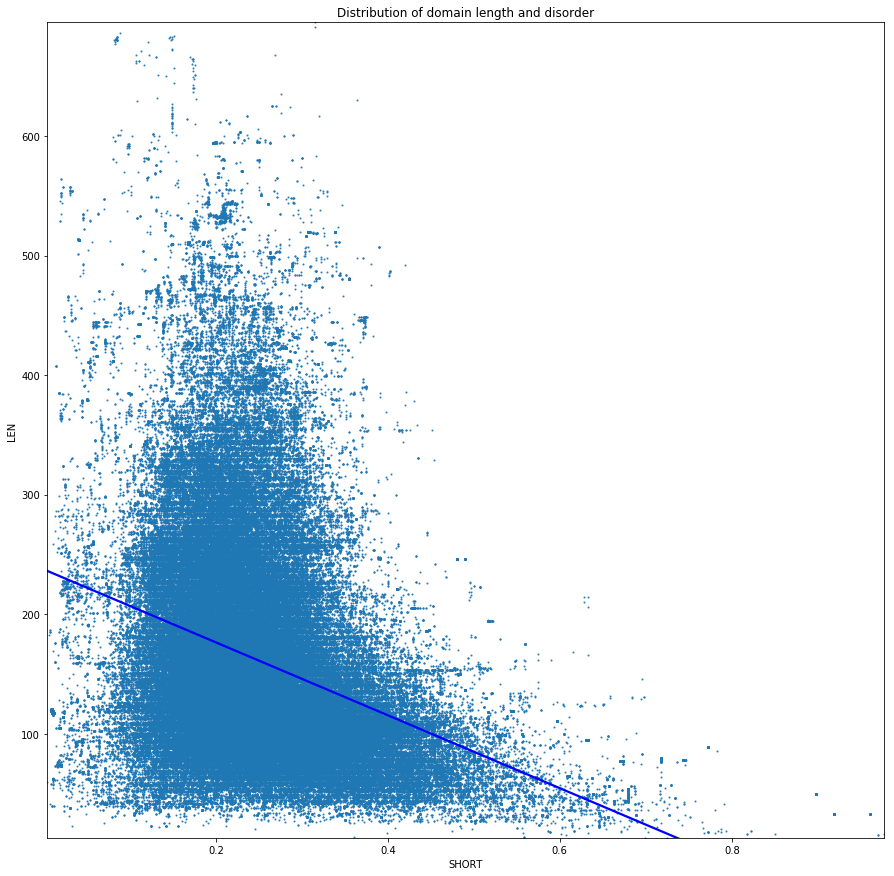

In [4]:
plt_regplot(df[df.LEN < 700], 'LEN', 'SHORT',
           savedname='./figs/LEN_SHORT_scatter.png',
           title='Distribution of domain length and disorder')

In [5]:
def plt_inter_scatter_len(s, col1, col2, savedname='./figs/tmp.html', show='jup',
                col_cutoff=False, cutoff=False, title=False, marksize=15):
    '''
    Plots the scatter plot for length and short
    '''
    x = s[col1]
    y = s[col2]
    trace=go.Scatter(
    x=x,
    y=y,
    mode = 'markers',
    marker=dict(size=5,
               color = 'rgba(200, 0, 0, .5)'),
               hoverinfo='text',
    text= 'SFAM ID: ' + s.index + '<br> Disorder: ' + x.round(3).astype(str) + '<br> Mean length: ' + y.round(3).astype(str),
    line=dict(width=2))

    data=[trace]
    layout = go.Layout(dict(hovermode='closest',
    title='Disorder of domains in CATH superfamilies',
    xaxis= dict(
        title='Mean disorder score using "short" method in iupred',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title='Mean length of domains',
        ticklen= 5,
        gridwidth= 2,
    )))
    fig = go.Figure(data, layout)
    if show == 'jup':
        plotly.offline.iplot(fig)
    elif show == 'html':
        plotly.offline.plot(fig, filename=savedname)
plt_inter_scatter_len(sfam, 'SHORT', 'LEN', show='jup')

In [6]:
print("Method used - LONG\n")
print("Proportion of superfamilies with disorder over 0.5")
print(round(len(sfam.LONG[sfam.LONG>0.5])/len(sfam.LONG)*100,3))
print("\nProportion of domains with disorder over 0.5")
print(round(len(df.LONG[df.LONG > 0.5])/len(df)*100, 3))

Method used - LONG

Proportion of superfamilies with disorder over 0.5
3.072

Proportion of domains with disorder over 0.5
1.81


In [7]:
print("Method used - SHORT\n")
print("Proportion of superfamilies with disorder over 0.5")
print(round(len(sfam.SHORT[sfam.SHORT>0.5])/len(sfam.SHORT)*100,3))
print("\nProportion of domains with disorder over 0.5")
print(round(len(df.SHORT[df.SHORT > 0.5])/len(df)*100, 3))

Method used - SHORT

Proportion of superfamilies with disorder over 0.5
3.154

Proportion of domains with disorder over 0.5
1.328


In [8]:
print('Correlation between method difference and domain length (all)')
print(round(sfam.DIS_DIFF.corr(sfam.LEN), 3))
print('\nCorrelation between method difference and domain length (domains under 150 aa long)')
print(round(sfam[sfam.LEN<150].DIS_DIFF.corr(sfam[sfam.LEN<150].LEN), 3))

Correlation between method difference and domain length (all)
-0.424

Correlation between method difference and domain length (domains under 150 aa long)
-0.535


In [9]:
print("Mean length of all domains in CATH")
print(round(df.LEN.mean()))
print("\nMean length of domains in CATH with disorder over 0.5")
print(round(df[df.SHORT<0.5].LEN.mean()))
print("\nMean length of domains in CATH with disorder under 0.5")
print(round(df[df.SHORT>0.5].LEN.mean()))

Mean length of all domains in CATH
161.0

Mean length of domains in CATH with disorder over 0.5
162.0

Mean length of domains in CATH with disorder under 0.5
68.0


In [10]:
sfam[sfam.LEN>50].sort_values('SHORT', ascending=False).head(5)

LEN      LONG  MAX_LEN  MIN_LEN   SAMPLE     SHORT  SIZE  \
4.10.950.10    77.595349  0.821102       80       75  1w2bA03  0.709371   215   
2.10.250.10    93.500000  0.805091      146       53  1k9cA00  0.699250     4   
1.10.1220.100  56.309091  0.701417       57       56  4nrtA02  0.679880    55   
3.30.1310.30   61.000000  0.742811       61       61  2d46A00  0.671561     1   
3.30.730.30    71.000000  0.744892       71       71  2kvtA00  0.661638     1   

                 STD_LEN  STD_LONG  STD_SHORT  DIS_DIFF  STD_LEN_PERC  
4.10.950.10     1.139346  0.043430   0.029169  0.111731      0.014683  
2.10.250.10    40.137264  0.060560   0.033414  0.105842      0.429276  
1.10.1220.100   0.466378  0.060927   0.029618  0.021537      0.008282  
3.30.1310.30         NaN       NaN        NaN  0.071250           NaN  
3.30.730.30          NaN       NaN        NaN  0.083254           NaN